In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
## ## Input Parameters
## Experimental data first, then rietveld refined.
pathes = ["a) Experimental BTO XRPD pattern.dat","b) Rietveld refined BTO XRPD pattern.dat"]

## Change this to ~1500 when saving for the last time (saves time while running to debug but change to 1500 to get high res images)
dpi_for_saving = 15

## if you get errors because have no latex in your computer you can make this False
plt.rcParams['text.usetex'] = True 

C:\Users\Ijslo\AppData\Local\Temp\ipykernel_12984\1453928618.py:72: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


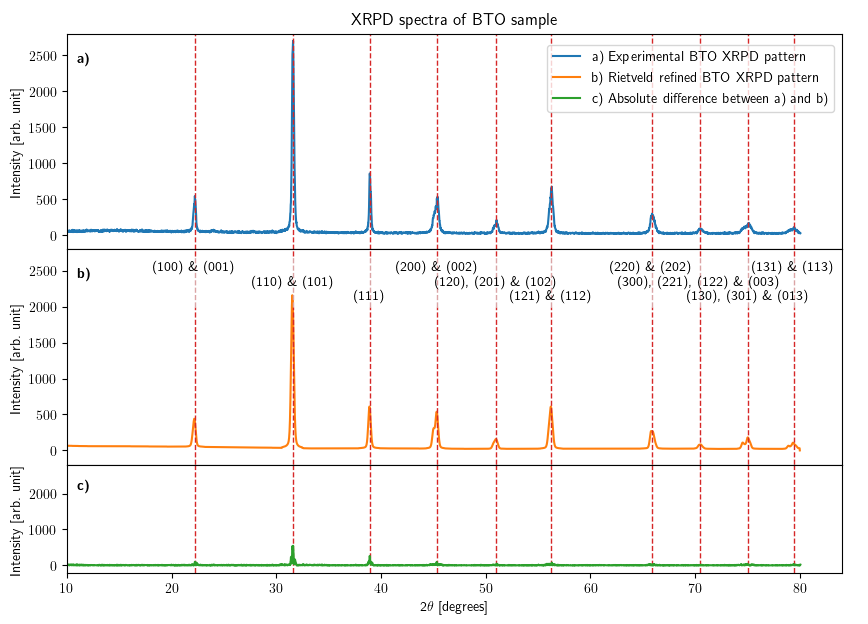

In [3]:
## Setup
fig, axes = plt.subplots(3,1,height_ratios=[2,2,1],figsize = (10,7),sharex=True,)

## Data
datas = []
for i in range(len(pathes)):
    calcdata = []
    with open(pathes[i],'r') as file:
        header = [float(x) for x in file.readline().split()]
        calcdata = [float(x) for line in file for x in line.split()]
    df = pd.DataFrame(columns = ["2theta","intensity"])
    df["2theta"] = np.arange(header[0],header[2]+0.02,header[1])
    df["intensity"] = calcdata
    data = {
        "Name": pathes[i],
        "data": df
    }
    datas.append(data)

## Peaks
peak_pathes = ["BTO_Peaks.csv"]
for i in range(len(peak_pathes)):
    with open(peak_pathes[i],'r') as file:
        name  = file.readline()
        df = pd.read_csv(file,delimiter=";")    
        peaks = {
            "Name": name,
            "Data": df
        }   

## Plot data
leg = {
    "Lines":[],
    "Labels":[]
}
miller_indices = [["(100)","(001)"],["(110)","(101)"],["(111)"],["(200)","(002)"],["(120)","(201)","(102)"],["(121)","(112)"],["(220)","(202)"],["(300)","(221)","(122)","(003)"],["(130)","(301)","(013)"],["(131)","(113)"]]
for i in [0,1]:
    leg["Lines"].append(axes[i].plot(datas[i]["data"]["2theta"],datas[i]["data"]["intensity"],linewidth = 1.5,label=datas[i]["Name"].split(".")[0], color = ["C0","C1"][i])[0])
    leg["Labels"].append(datas[i]["Name"].split(".")[0])
    axes[i].tick_params(bottom=False)
    
for i in range(len(axes)):
    #axes[i].grid()
    axes[i].set(ylabel="Intensity [rel. unit]",xlim=(10,84),ylim=(-200,2800))
    axes[i].annotate([r"\textbf{a)}",r"\textbf{b)}",r"\textbf{c)}"][i], (11,[2400,2400,2100][i]))
    for x in range(len(miller_indices)):
        if i == 1:
            axes[i].vlines(peaks["Data"]["2theta"][x], color="C3",ymin = -400, ymax= 2000, linewidth = 1,linestyle = "dashed")
            axes[i].vlines(peaks["Data"]["2theta"][x], color="#dba4a5",ymin = 2000, ymax= 2700, linewidth = 1,linestyle = "dashed")
            axes[i].vlines(peaks["Data"]["2theta"][x], color="C3",ymin = 2700, ymax= 3000, linewidth = 1,linestyle = "dashed")
            continue
        axes[i].vlines(peaks["Data"]["2theta"][x], color="C3",ymin = -400, ymax= 3000, linewidth = 1,linestyle = "dashed")

def Difference(one,two):
    return abs(datas[one]["data"]["intensity"]-datas[two]["data"]["intensity"])

def isOdd(num):
    return num%3

for x in range(len(miller_indices)):
    axes[1].annotate(", ".join(miller_indices[x][:-1])+(r" \& " if (len(miller_indices[x])>1) else "")+miller_indices[x][-1],(peaks["Data"]["2theta"][x],2500-(200*isOdd(x))),ha = "center")

leg["Lines"].append(axes[2].plot(datas[0]["data"]["2theta"],Difference(0,1),linewidth = 1.5,label= "Difference between experimental and rietveld refined BTO XRPD pattern",color = "C2")[0])
leg["Labels"].append(r"c) Absolute difference between a) and b)")
axes[2].set(xlabel=r"2$\theta$ [degrees]")
axes[0].set(title =r"XRPD spectra of BTO sample")
fig.legend(handles = leg["Lines"],labels = leg["Labels"],loc = (.63,.82))

## Format
#fig.tight_layout()
fig.subplots_adjust(hspace=0)
fig.show()
fig.savefig("XRPD",dpi = dpi_for_saving,bbox_inches='tight')